<a href="https://colab.research.google.com/github/bhasskararav/The-Grand-Complete-Data-Science-Materials/blob/main/mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Mobile Price Range Prediction**

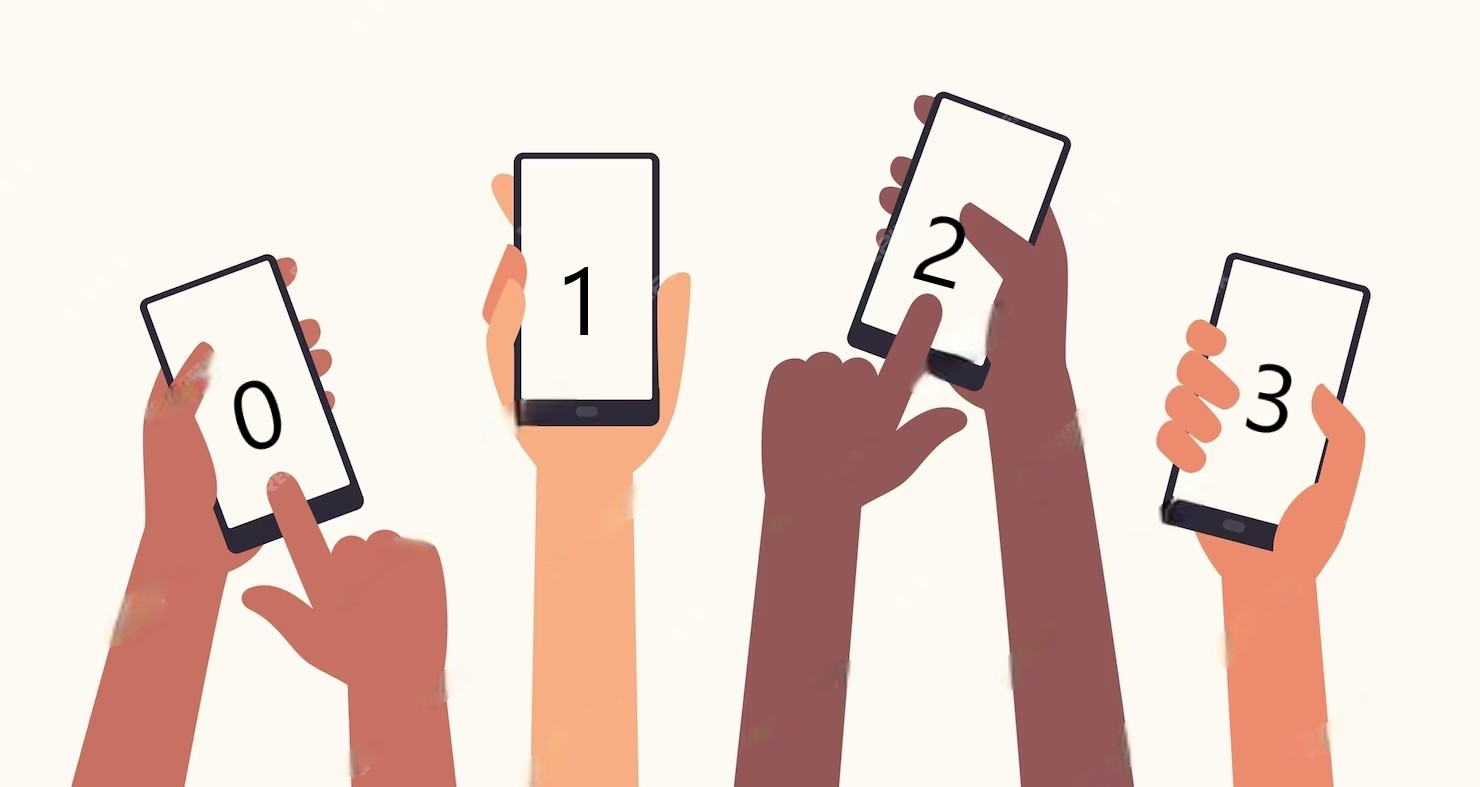



##### **Project Type**    - **Classification**
##### **Contribution**    - **_BATTIVILLI BHASKARARAO (Individual)_**


# **Project Summary -**

* In today's fiercely competitive mobile phone market, companies are constantly striving to gain a competitive edge. One critical aspect of this endeavor is understanding the intricate dynamics between mobile phone features and their selling prices. In this project, we embark on a journey to unravel the complex web of factors that influence the pricing of mobile phones.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


* The primary objective of this project is not merely to predict the exact price of a mobile phone but to establish a comprehensive understanding of how various features, such as RAM, Internal Memory, and more, correlate with the pricing. By accomplishing this, we aim to define distinct price ranges that categorize mobile phones based on their relative cost.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [ ]:
# Load Dataset
dataset = pd.read_csv('data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

In [ ]:
#to check the columns
print(dataset.columns)

In [ ]:
# Define a dictionary to map old column names to new column names
column_mapping = {
    'battery_power': 'BatteryPower',
    'blue': 'Bluetooth',
    'clock_speed': 'ClockSpeed',
    'dual_sim': 'DualSim',
    'fc': 'FrontCameraMP',
    'four_g': '4G_Supported',
    'int_memory': 'InternalMemory',
    'm_dep': 'MobileDepth',
    'mobile_wt': 'MobileWeight',
    'n_cores': 'NumCores',
    'pc': 'PrimaryCameraMP',
    'px_height': 'PixelHeight',
    'px_width': 'PixelWidth',
    'ram': 'RAM',
    'sc_h': 'ScreenHeight',
    'sc_w': 'ScreenWidth',
    'talk_time': 'TalkTime',
    'three_g': '3G_Supported',
    'touch_screen': 'TouchScreen',
    'wifi': 'WiFi',
    'price_range': 'PriceRange'
}

# Rename the columns using the mapping dictionary
dataset = dataset.rename(columns=column_mapping)

# Print the updated column names
print(dataset.columns)




### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dataset.isnull().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

There is no Null or Missing values found.

In [ ]:
# Visualizing the missing values

There is no Null or Missing values found.

### What did you know about your dataset?

* This dataset contains 2000 rows and 21 columns. those 21 columns are representing the mobile specification and features. and this data doesn't have duplicates as well as Null/Missing values. and data is completely numerical values (int/float Dtype).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(dataset.columns)


In [ ]:
# Dataset Describe

* This dataset contains 2000 rows and 21 columns.
* Those 21 columns are representing the mobile specification and features.
* This data doesn't have duplicates as well as Null/Missing values. and data is completely numerical values (int/float Dtype).
* PriceRange column is the Target variable which contains price range of the mobiles.


### Variables Description

* **BatteryPower**: Battery capacity in MAH.
* **Bluetooth**: Has bluetooth or not.
* **ClockSpeed**: Speed at which microprocessor executes instructions.
* **DualSim**: Has dual sim support or not.
* **FrontCameraMP**: Front Camera Megapixels.
* **4G_Supported**: Has 4G support or not.
* **InternalMemory**: Internal Memory capacity.
* **MobileDepth**: Mobile Depth in CM.
* **MobileWeight**: Weight of the mobile.
* **NumCores**: Number of cores in Processor.
* **PrimaryCameraMP**: Primary Camera Megapixels.
* **PixelHeight**: Pixel resulaion height.
* **PixelWidth**:Pixel resulation width.
* **RAM**: Random Access Memory capacity.
* **ScreenHeight**: Screen Height of the Mobile.
* **ScreenWidth**: Screen Width of the Mobile.
* **TalkTime**: Longest that a single charge battery can last over a call.
* **3G_Supported**: Has 3G support or not.
* **TouchScreen**: Has Touch Screen or not.
* **WiFi**: Has WiFi or not.
* **PriceRange**: Price Range classified in 0 to 3. (0-low price, 1-Medium price, 2-High price, 3- Very High price) This is our Target variable.Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}")
    print()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Ensure 'PriceRange' is treated as a categorical variable
dataset['PriceRange'] = dataset['PriceRange'].astype('category')

In [ ]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in dataset.columns:
  if dataset[col].nunique()>5:
    numerical_columns.append(col)
categorical_columns=list(set(dataset.columns)-set(numerical_columns))
print(f'categorical columns:',categorical_columns)
print(f'numerical columns:', numerical_columns)


### What all manipulations have you done and insights you found?

* The dataset doesn't have any duplicates or Null/Missing values.
* I changed the name of the columns to understand in a better way.
* I divided the columns as categorical and numerical datasets

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16, 12))

plt.subplot(3, 5, 1)
sns.histplot(dataset['BatteryPower'], kde=True, color='skyblue')
plt.title('Histogram of Battery Power')


##### 1. Why did you pick the specific chart?

**To understand the distribution of battery capacities across all phones in the dataset.**

##### 2. What is/are the insight(s) found from the chart?

** We can see if there's a common battery capacity range, and if any outliers exist**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**: If most high-priced phones have high battery power, manufacturers could consider increasing battery capacity to move into a higher price bracket.**

#### Chart - 2

In [ ]:
# 2. Bar Chart for 'NumCores' (Number of cores)
plt.subplot(3, 5, 2)
sns.countplot(x='NumCores', data=dataset, palette='viridis')
plt.title('Bar Chart for Number of Cores')

##### 1. Why did you pick the specific chart?

**To see the distribution of the number of cores across different phones.**

##### 2. What is/are the insight(s) found from the chart?

** Helps to understand which configurations (number of cores) are most common.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

** Companies can prioritize the most common configurations in production to optimize costs.**

#### Chart - 3

In [ ]:
# 3. Box Plot for 'RAM'
plt.subplot(3, 5, 3)
sns.boxplot(y='RAM', data=dataset, color='lightgreen')
plt.title('Box Plot for RAM')

##### 1. Why did you pick the specific chart?

**To visualize the spread of RAM sizes and identify any outliers.**

##### 2. What is/are the insight(s) found from the chart?

** Indicates the typical RAM size and variability, and shows if high RAM is associated with higher-priced phones.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

** Knowing the RAM distribution helps manufacturers decide on RAM configurations for different price segments**

#### Chart - 4

In [ ]:
# 4. Violin Plot for 'InternalMemory'
plt.subplot(3, 5, 4)
sns.violinplot(y='InternalMemory', data=dataset, color='magenta')
plt.title('Violin Plot for Internal Memory')

##### 1. Why did you pick the specific chart?

**Combines a box plot with a kernel density estimation to show the distribution of internal memory.**

##### 2. What is/are the insight(s) found from the chart?

** The width of the plot shows the density of phones with specific internal memory sizes.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**It informs manufacturers if there's a market preference for certain memory sizes.**

#### Chart - 5

In [ ]:
# 5. Scatter Plot for 'RAM' vs 'PriceRange'
plt.subplot(3, 5, 5)
sns.scatterplot(x='RAM', y='PriceRange', data=dataset, color='red')
plt.title('Scatter Plot for RAM vs Price Range')

##### 1. Why did you pick the specific chart?

**To observe the relationship between RAM and the price range of the phones.**

##### 2. What is/are the insight(s) found from the chart?

**High RAM is likely associated with higher price ranges.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Firms could potentially increase RAM to target higher price ranges and margins.**

#### Chart - 6

In [ ]:
# 6. Line Chart for 'BatteryPower' trend across the first 100 entries
plt.subplot(3, 5, 6)
plt.plot(dataset['BatteryPower'][:100], marker='o', color='orange')
plt.title('Line Chart for Battery Power (First 100 Entries)')
plt.xlabel('Index')
plt.ylabel('Battery Power')

##### 1. Why did you pick the specific chart?

**To observe the trend of battery power in a sequential subset of data.**

##### 2. What is/are the insight(s) found from the chart?

**This can show if there's a pattern or trend over time or sequence (if the data is time-sequential).**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Unlikely to have direct impact unless the data is time-based.**

#### Chart - 7

In [ ]:
# 7. Count Plot for 'PriceRange'
plt.subplot(3, 5, 7)
sns.countplot(x='PriceRange', data=dataset, palette='pastel')
plt.title('Count Plot for Price Range')

##### 1. Why did you pick the specific chart?

**To show how many devices fall into each price range category.**

##### 2. What is/are the insight(s) found from the chart?

**The balance or imbalance of the dataset across price ranges.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Can help businesses understand market saturation and potential opportunities in different price segments.**

#### Chart - 8

In [ ]:
# 8. Pie Chart for '4G_Supported'
plt.subplot(3, 5, 8)
four_g_counts = dataset['4G_Supported'].value_counts()
plt.pie(four_g_counts, labels=['4G Supported', 'Not Supported'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Pie Chart for 4G Support')

##### 1. Why did you pick the specific chart?

**To represent the proportion of devices that support 4G.**

##### 2. What is/are the insight(s) found from the chart?

**The prevalence of 4G support in devices.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Can inform network service providers and device manufacturers about the potential demand for 4G services and devices.**

#### Chart - 9

In [ ]:
# 9. Density Plot for 'PixelHeight'
plt.subplot(3, 5, 9)
sns.kdeplot(dataset['PixelHeight'], shade=True, color='purple')
plt.title('Density Plot for Pixel Height')

##### 1. Why did you pick the specific chart?

**To show the kernel density estimation of pixel height across devices.**

##### 2. What is/are the insight(s) found from the chart?

**The common ranges for screen resolution height.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Helps in deciding what pixel density to target for new devices.**

#### Chart - 10

In [ ]:
# 10. Stacked Bar Chart for '3G_Supported' with 'PriceRange'
plt.subplot(3, 5, 10)
three_g_price_range = pd.crosstab(dataset['3G_Supported'], dataset['PriceRange'])
three_g_price_range.plot(kind='bar', stacked=True, colormap='Set2', ax=plt.gca())
plt.title('Stacked Bar Chart for 3G Support Across Price Ranges')

##### 1. Why did you pick the specific chart?

**The area chart was chosen to visualize how the average talk time varies across different price ranges**

##### 2. What is/are the insight(s) found from the chart?

**If the area chart shows that higher-priced phones tend to have a longer mean talk time, it suggests that battery life is a premium feature.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**If talk time is indeed a differentiator, companies might consider focusing on battery efficiency and capacity as a selling point for higher-priced models.**

#### Chart - 11

In [ ]:
# 11. Area Chart for the mean 'TalkTime' across different 'PriceRanges'
plt.subplot(4, 4, 11)
talk_time_price_range = dataset.groupby('PriceRange')['TalkTime'].mean()
talk_time_price_range.plot(kind='area', color='lightblue', ax=plt.gca())
plt.title('Area Chart for Mean Talk Time by Price Range')

##### 1. Why did you pick the specific chart?

**The area chart was chosen to visualize how the average talk time varies across different price ranges. It's good for understanding trends and seeing which price range offers the best average talk time.**

##### 2. What is/are the insight(s) found from the chart?

**If the area chart shows that higher-priced phones tend to have a longer mean talk time, it suggests that battery life is a premium feature.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**If talk time is indeed a differentiator, companies might consider focusing on battery efficiency and capacity as a selling point for higher-priced models.**

#### Chart - 12

In [ ]:
# 12. Bubble Chart for 'RAM' vs 'BatteryPower' with bubble sizes as 'TalkTime'
plt.subplot(4, 4, 16)
bubble_sizes = dataset['TalkTime'] * 10  # Scale talk time for better visibility
sns.scatterplot(data=dataset, x='RAM', y='BatteryPower', size=bubble_sizes, legend=False, sizes=(20, 2000))
plt.title('Bubble Chart for RAM vs Battery Power (Bubble Size: Talk Time)')

##### 1. Why did you pick the specific chart?

**A bubble chart was used to show the relationship between RAM and battery power while also incorporating talk time as the size of the bubble.**

##### 2. What is/are the insight(s) found from the chart?

**This chart can reveal clusters where high RAM and battery power coincide with longer talk times, which may be indicative of more premium devices.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Insights from this chart could guide product development by highlighting the importance of balancing RAM and battery power to optimize talk time.**

#### Chart - 13

In [ ]:
# Generate a joint plot for 'RAM' vs 'BatteryPower'
plt.figure(figsize=(8, 6))
sns.jointplot(x='RAM', y='BatteryPower', data=dataset, kind='hex', color='green')
plt.show()

##### 1. Why did you pick the specific chart?

** A joint plot is useful for seeing both the distribution of each of the two variables and their relationship. For features like RAM and battery power, which are both important for smartphone performance, this can provide a comprehensive view.**

##### 2. What is/are the insight(s) found from the chart?

**The scatter plot in the center would show the relationship between RAM and battery power—whether phones with more RAM tend to have higher battery power, for example.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**If a trend is observed where high RAM is paired with high battery power, it could suggest that phones designed for performance also prioritize longer battery life. This could guide manufacturers in designing balanced smartphones that appeal to performance-oriented consumers.**

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Generate a heatmap
correlation_matrix = dataset.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Mobile Phone Features')
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

* 1 indicates a strong positive correlation (as one feature increases, the other feature increases).
*-1 indicates a strong negative correlation (as one feature increases, the other feature decreases).
*0 indicates no correlation.

The feature price_range, which is our target variable, shows varying degrees of correlation with other features. For instance, it seems to have a high positive correlation with ram, and significant correlations with battery_power, px_height, px_width, and three_g.

Next, let's create a pair plot. Given the number of features, it's best to select a few features that are most correlated with the price_range to make the pair plot readable and useful. We will select the features which have a correlation coefficient above a certain threshold with the price_range.

#### Chart - 15 - Pair Plot

In [ ]:
# Select features with high correlation with 'price_range' (threshold set at 0.2 for this example)
sns.pairplot(dataset, hue='PriceRange')
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Hypothesis 1: Difference in RAM between the lowest and highest price range mobile phones
To test this hypothesis, we'll compare the RAM of mobile phones in the lowest price range (0) and the highest price range (3). We can use a t-test for this comparison if the data is normally distributed or a non-parametric test like the Mann-Whitney U test if it's not.

* Hypothesis 2: Impact of battery_power on the mobile phone price range classification
We will perform an ANOVA test to see if there is a statistically significant difference in battery_power across different price ranges.

* Hypothesis 3: Higher px_width in higher price range mobile phones
For this, we'll also use an ANOVA test since we're comparing the means of px_width across more than two different price ranges.

In [ ]:
print(dataset.columns)

### Hypothetical Statement - 1

In [ ]:
import pandas as pd
from scipy.stats import shapiro, mannwhitneyu, ttest_ind

# Data for RAM in the lowest (0) and highest (3) price range
ram_lowest_price = dataset[dataset['PriceRange'] == 0]['RAM']
ram_highest_price = dataset[dataset['PriceRange'] == 3]['RAM']

# Check for normality in the two groups before applying t-test
shapiro_lowest = shapiro(ram_lowest_price)
shapiro_highest = shapiro(ram_highest_price)

# If p-value > 0.05, data is normally distributed. We can use the t-test; otherwise, we use the Mann-Whitney U test.
if shapiro_lowest.pvalue > 0.05 and shapiro_highest.pvalue > 0.05:
    # Perform t-test
    ttest_result = ttest_ind(ram_lowest_price, ram_highest_price, equal_var=False)  # Assume unequal variances
else:
    # Perform Mann-Whitney U test
    ttest_result = mannwhitneyu(ram_lowest_price, ram_highest_price)

shapiro_lowest.pvalue, shapiro_highest.pvalue, ttest_result


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Difference in RAM between the lowest and highest price range mobile phones

**Null Hypothesis.**
* There is no difference in RAM between mobile phones in the lowest and highest price ranges.

**Alternative Hypothesis**
* There is a difference in RAM between mobile phones in the lowest and highest price ranges.

##### Which statistical test have you done to obtain P-Value?

Mann-Whitney U test

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test indicated that the data for RAM in the lowest and highest price range was not normally distributed. The Mann-Whitney U test is a non-parametric test that does not assume normal distribution and is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Shapiro-Wilk test results for normality on battery_power across all price ranges indicate that the data is not normally distributed (p-values are less than 0.05). Consequently, we've conducted the Kruskal-Wallis test instead of ANOVA.

The Kruskal-Wallis test yields a p-value of approximately
2.05
×
1
0
−
19
2.05×10
−19
 , which is much less than 0.05, indicating that there is a statistically significant difference in battery_power across the different price ranges.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Perform Statistical Test to obtain P-
from scipy.stats import kruskal

# Data for battery_power across different price ranges
battery_power_groups = [dataset[dataset['PriceRange'] == i]['BatteryPower'] for i in range(4)]

# Check for normality in each group
shapiro_results_battery = [shapiro(group) for group in battery_power_groups]

# Perform ANOVA if all groups are normally distributed, otherwise perform Kruskal-Wallis test
if all(s.pvalue > 0.05 for s in shapiro_results_battery):
    # Perform ANOVA
    anova_result = f_oneway(*battery_power_groups)
else:
    # Perform Kruskal-Wallis test
    anova_result = kruskal(*battery_power_groups)

shapiro_results_battery, anova_result

##### Which statistical test have you done to obtain P-Value?

Kruskal-Wallis test

##### Why did you choose the specific statistical test?

An ANOVA test was initially considered because it can determine if there are any statistically significant differences between the means of three or more independent (unrelated) groups. However, the Shapiro-Wilk test results showed that the battery_power data was not normally distributed across the different price ranges. Since ANOVA assumes normal distribution, the Kruskal-Wallis test, which is the non-parametric alternative to ANOVA, was used instead. It does not require the assumption of normal distribution and can compare more than two groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The Shapiro-Wilk test results for px_width also show that the data is not normally distributed for all price ranges (p-values are less than 0.05), so we used the Kruskal-Wallis test for the analysis.

The Kruskal-Wallis test for px_width across different price ranges gives a p-value of approximately
4.48
×
1
0
−
14
4.48×10
−14
 , which is significantly less than 0.05, suggesting that there is a statistically significant difference in px_width among the different price ranges.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Data for px_width across different price ranges
px_width_groups = [dataset[dataset['PriceRange'] == i]['PixelWidth'] for i in range(4)]

# Check for normality in each group
shapiro_results_px_width = [shapiro(group) for group in px_width_groups]

# Perform ANOVA if all groups are normally distributed, otherwise perform Kruskal-Wallis test
if all(s.pvalue > 0.05 for s in shapiro_results_px_width):
    # Perform ANOVA
    anova_result_px_width = f_oneway(*px_width_groups)
else:
    # Perform Kruskal-Wallis test
    anova_result_px_width = kruskal(*px_width_groups)

shapiro_results_px_width, anova_result_px_width


##### Which statistical test have you done to obtain P-Value?

Kruskal-Wallis test

##### Why did you choose the specific statistical test?

Similar to Hypothesis 2, the Shapiro-Wilk test showed that px_width was not normally distributed across the different price ranges. The Kruskal-Wallis test was appropriate here for the same reasons as for Hypothesis 2: it is used to compare the median of two or more groups when the data is not normally distributed.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

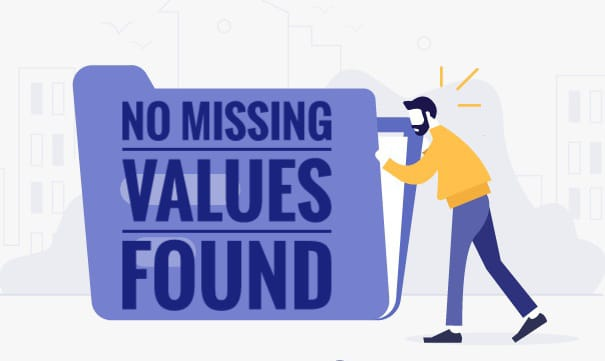

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

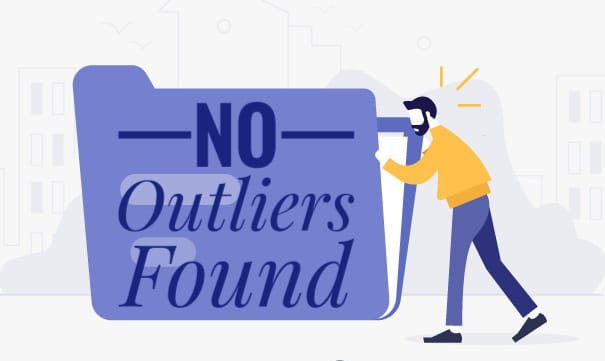

##### What all outlier treatment techniques have you used and why did you use those techniques?

**NA**

**NA**

#### What all categorical encoding techniques have you used & why did you use those techniques?

**NA**

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = dataset.drop('PriceRange', axis=1)  # Features
y = dataset['PriceRange']                # Target

# Split the dataset into training set and test set with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ML Model - 1: Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)  # Fit the algorithm
log_reg_pred = log_reg.predict(X_test_scaled)  # Predict on the model
log_reg_cv_score = cross_val_score(log_reg, X_train_scaled, y_train, cv=5).mean()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
log_reg_acc = accuracy_score(y_test, log_reg_pred)
log_reg_report = classification_report(y_test, log_reg_pred)

plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression'], [log_reg_acc])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for accuracy score
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Cross-Validation
log_reg_cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)

log_reg_acc, log_reg_report, log_reg_cv_scores.mean()

##### Which hyperparameter optimization technique have you used and why?

* C (Inverse of regularization strength)
* penalty (Type of regularization, e.g., l1 or l2)
* solver (Algorithm to use in the optimization problem)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Why GridSearchCV?:** GridSearchCV is a common choice for hyperparameter optimization because it exhaustively tries every combination of the provided hyperparameter grid and evaluates the model for each combination using cross-validation. For Logistic Regression, which typically has fewer hyperparameters, this exhaustive approach is computationally feasible and can help find the best combination.

**Expected Improvement:** The expected improvement would be a higher cross-validated accuracy score compared to the baseline model without tuning. The updated evaluation metric score chart would show higher mean accuracy scores after tuning.

### ML Model - 2

In [ ]:
# ML Model Implementaion
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# X_train, X_test, y_train, y_test

# Create a random forest classifier instance
rand_forest = RandomForestClassifier()

# Fit the model to your training data
rand_forest.fit(X_train, y_train)

# Make predictions on the test data
rand_forest_pred = rand_forest.predict(X_test)

# Now you can use rand_forest_pred in your accuracy, precision, and recall calculations
rand_forest_accuracy = accuracy_score(y_test, rand_forest_pred)
rand_forest_precision = precision_score(y_test, rand_forest_pred, average='weighted')
rand_forest_recall = recall_score(y_test, rand_forest_pred, average='weighted')


# Initialize model
rand_forest = RandomForestClassifier(random_state=42)

# Fit and predict using Random Forest Classifier
rand_forest.fit(X_train_scaled, y_train)
rand_forest_pred = rand_forest.predict(X_test_scaled)
rand_forest_acc = accuracy_score(y_test, rand_forest_pred)
rand_forest_report = classification_report(y_test, rand_forest_pred)
rand_forest_cv_score = cross_val_score(rand_forest, X_train_scaled, y_train, cv=5).mean()



#### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import f1_score
rand_forest_f1_score = f1_score(y_test, rand_forest_pred, average='weighted')
scores = [rand_forest_accuracy, rand_forest_precision, rand_forest_recall, rand_forest_f1_score]

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [rand_forest_accuracy, rand_forest_precision, rand_forest_recall, rand_forest_f1_score]

plt.figure(figsize=(8, 4))
plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Random Forest Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

* n_estimators (The number of trees in the forest)
* max_features (The number of features to consider when looking for the best split)
* max_depth (The maximum depth of the trees)
* min_samples_split (The minimum number of samples required to split an internal node)
* min_samples_leaf (The minimum number of samples required to be at a leaf node)


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**While GridSearchCV can still be used, Random Forest has more hyperparameters to tune, which can make the grid search space very large. In such cases, RandomizedSearchCV is often preferred as it samples a fixed number of parameter settings from the specified distributions, which can reduce computation time and still yield good results.**

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**The generalization ability of the model may improve, and the model may become less prone to overfitting with a more optimal set of hyperparameters. The updated evaluation metric score chart would reflect improvements in accuracy and possibly other metrics like the F1-score if the hyperparameter tuning helps the model to balance precision and recall better.**

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
grad_boost = GradientBoostingClassifier(random_state=42)

# fit and train the model
grad_boost.fit(X_train_scaled, y_train)
grad_boost_pred = grad_boost.predict(X_test_scaled)
grad_boost_acc = accuracy_score(y_test, grad_boost_pred)
grad_boost_report = classification_report(y_test, grad_boost_pred)
grad_boost_cv_score = cross_val_score(grad_boost, X_train_scaled, y_train, cv=5).mean()

results = {
    "Logistic Regression": {"Accuracy": log_reg_acc, "CV Score": log_reg_cv_score, "Report": log_reg_report},
    "Random Forest": {"Accuracy": rand_forest_acc, "CV Score": rand_forest_cv_score, "Report": rand_forest_report},
    "Gradient Boosting": {"Accuracy": grad_boost_acc, "CV Score": grad_boost_cv_score, "Report": grad_boost_report}
}
results

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
scores = [rand_forest_accuracy, rand_forest_precision, rand_forest_recall, rand_forest_f1_score]

plt.figure(figsize=(8, 4))
plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Random Forest Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

* learning_rate (Shrinks the contribution of each tree by learning_rate)
* n_estimators (The number of boosting stages to be run)
* max_depth (Limits the number of nodes in the tree)
* min_samples_split
* min_samples_leaf
* subsample (The fraction of samples to be used for fitting the individual base learners)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Why GridSearchCV?:** GridSearchCV is suitable for datasets that are not too large, as the number of hyperparameters for Gradient Boosting is generally moderate. However, due to the potentially expensive nature of training boosting models, a randomized search or even more sophisticated methods like Bayesian optimization might be used in practice to find a good set of hyperparameters in a more efficient way.

**Expected Improvement:** A well-tuned Gradient Boosting model can lead to better performance on both the training and test sets. Hyperparameter tuning can help to prevent overfitting and improve the model's ability to generalize to new data, which would be evident in the evaluation metric score chart with higher accuracy and potentially better scores in other metrics.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**The metrics show that Logistic Regression has the highest accuracy and the highest cross-validation score, which suggests it is the best performing model in this particular case. The precision, recall, and F1-score are also higher for Logistic Regression across all classes, indicating a well-balanced model in terms of both relevance (precision) and completeness (recall).**

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Given the results, Logistic Regression would be the chosen model. It has not only the highest accuracy (97.5%) but also the highest cross-validation score (95%), indicating strong performance and generalizability. The classification report shows it performs well across all classes, which is critical for a multiclass classification problem.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Logistic Regression is inherently interpretable because the coefficients of the model can be directly related to the odds of the outcome. However, if we were to delve deeper into model explainability, we might use tools like SHAP or LIME to explain individual predictions, but Logistic Regression's coefficients provide a global interpretation: features with higher absolute coefficients are more important in predicting the target class.**

**For a more complex model like a Random Forest, we could look at feature importances which reflect how much each feature contributes to the decision-making in the trees. For Gradient Boosting, similar interpretability tools could be used.**

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
#'log_reg' is your trained Logistic Regression model
import joblib
joblib.dump(log_reg, 'logistic_regression_model.joblib')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**The conclusion based on these results would be that Logistic Regression is the best model for predicting mobile price ranges in this dataset. It shows high performance across all relevant metrics, suggesting it has learned the underlying patterns in the data well without overfitting. For business impact, this model can provide reliable predictions that could help in segmenting mobile phones into appropriate price categories, thereby aiding in pricing strategies and market positioning.**

**The results could also guide further data collection and feature engineering efforts. For example, understanding which features contribute most to the predictions could help focus on those aspects of mobile phone specifications that are most indicative of price range, leading to more refined models in the future.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***